In [4]:
#시각화 라이브러리 로딩 + 한글처리(한글폰트 추가)
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='batang'

In [5]:
#데이터 로딩
#우리는 미사용 p245 glob 라이브러리
# import glob
# all_xlsx = glob.glob('./*.xl*')
# all_xlsx
#p246 엑셀로 여러개 불러와서 합치기

import pandas as pd
all_files_concat = pd.read_excel('./논문100개.xls')
all_files_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
2,NaN,3,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
3,NaN,4,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
4,NaN,5,"Capturing the value of biosurveillance ""big da...","Castle, David; Hebert, Paul D.N.; Clare, Eliza...",John Wiley & Sons Ltd,2021
...,...,...,...,...,...,...
995,NaN,996,Rethinking 'big data' as visual knowledge: the...,"McCosker, Anthony; Wilken, Rowan",Taylor & Francis,2014
996,NaN,997,Rethinking ‘big data’ as visual knowledge: the...,"McCosker, Anthony; Wilken, Rowan",Taylor & Francis,2014
997,NaN,998,Social big data: Recent achievements and new c...,"Bello-Orgaz, G.; Jung, J. J.; Camacho, D.","Elsevier Science B.V., Amsterdam.",2016
998,NaN,999,Using ``Big Data'' Versus Alternative Measures...,"Ma-Kellams, Christine; Bishop, Brianna; Zhang,...",PERCEPTUAL AND MOTOR SKILLS,2018


In [6]:
#데이터 전처리1 - 영어가 아닌 단어 제외
#데이터 전처리2 - 소문자로 통일
#데이터 전처리3 - 단어 토큰화
#데이터 전처리4 - 불용어 제외
#데이터 전처리5 - 표제어 추출

#자연어 처리 라이브러리 nltk(natural language tool kit)

from nltk.corpus import stopwords       
import re                               #1, 2 - 정규식
from nltk.tokenize import word_tokenize #3
from nltk.stem import WordNetLemmatizer #5


In [7]:
#nltk라이브러리는 최초 관련리소스 다운로드 필요
import nltk
nltk.download() #창 뜨면서 다운로드됨

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
#영어 불용어 저장 p247
stopWords = set(stopwords.words("english")) #추가할때 중복방지를 위해 set으로 변경
stopWords.add('big')
stopWords.add('data')
#표제어 추출을 위해서 객체생성
lemma = WordNetLemmatizer()

In [9]:
words = [] #뽑아서 저장해둘 단어 리스트
for title in all_files_concat['제목']:
   EnWords = re.sub(r"[^a-zA-Z]+"," ",title)  #영어가 아닌문자를 공백으로 치환
   EnWords2 = EnWords.lower()                  #대문자를 소문자로 변경
   EnWordsToken = word_tokenize(EnWords2)           #문자 토큰화 - split이랑 비슷한듯
   EnWordsTokenStop = [word for word in EnWordsToken if word not in stopWords]  #불용어가 아닌 단어만 추출해서 리스트로 저장
   EnWordsTokenStopLemma = [lemma.lemmatize(word) for word in EnWordsTokenStop if len(lemma.lemmatize(word)) != 1] #단어 표제화해서 리스트로 저장
   words += EnWordsTokenStopLemma


In [10]:
#교재 방식
from functools import reduce
a = []
b = [1,2]
c = [1,2]
a.append(b)
a.append(c)
t = list(reduce(lambda x,y:x+y,a))
t

[1, 2, 1, 2]

In [11]:
#데이터 탐색
from collections import Counter

count = Counter(words)
#i = 0
#sorted_count = sorted(count.items(), key= lambda item:item[1], reverse=True)
# for word,counts in dict(sorted_count).items():
#     if i < 50:
#         print(word, counts)
#         i+=1
#     else:
#         break
        #상위 50개까지 정렬해줌
for i in count.most_common(50):
    print(i[0], i[1])

analytics 110
based 105
analysis 93
driven 66
system 63
approach 57
using 56
issue 48
learning 48
model 44
challenge 43
new 41
application 40
special 37
algorithm 36
science 36
call 34
platform 34
management 34
framework 33
health 33
paper 32
era 31
cloud 30
research 28
opportunity 27
technology 27
machine 26
processing 26
smart 26
network 26
mining 25
computing 25
earth 25
method 24
information 24
optimization 24
performance 24
distributed 23
perspective 23
use 22
business 22
review 21
intelligence 21
process 21
service 21
world 21
real 20
study 19
survey 19


<BarContainer object of 20 artists>

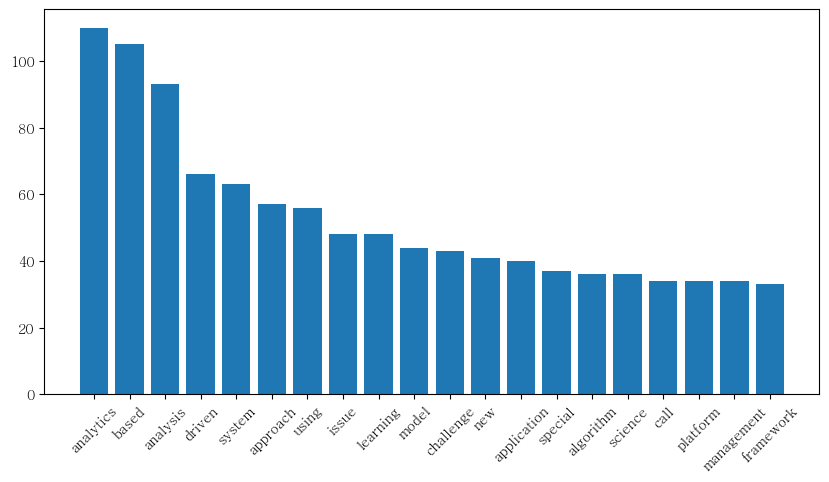

In [12]:
# for w, c in count.items():
#     if len(w) == 1:
#         print(w,":",c)

#단어횟수 시각화 p250
most20 = count.most_common(20)

y = [i[1] for i in most20]
x = [i[0] for i in most20]
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)
plt.bar(x,y)


[(2003, 1), (2004, 1), (2011, 5), (2012, 20), (2013, 51), (2014, 129), (2015, 91), (2016, 115), (2017, 129), (2018, 119), (2019, 88), (2020, 101), (2021, 90), (2022, 56), (2023, 4)]


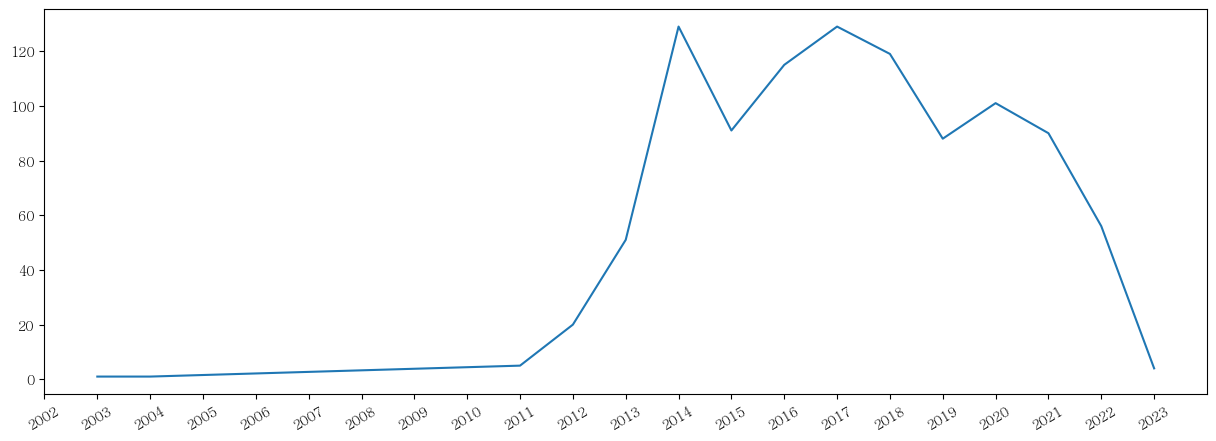

In [13]:
date_list = []
for date in all_files_concat['출판일']:
    date_list.append(date)
date_count = Counter(date_list)
sort_date = sorted(date_count.items())
print(sort_date)
x = [i[0] for i in sort_date]
y = [i[1] for i in sort_date]
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xticks([i for i in range(x[0]-1,x[-1]+1)],rotation=30)
plt.show()

In [24]:
from wordcloud import STOPWORDS,WordCloud
print("워드클라우드 갯수",len(STOPWORDS),"nltk 갯수",len(stopWords))
all_sw = stopWords.copy()
dup_list = []
added_list = []
for w in STOPWORDS:
    if w in stopWords:
        dup_list.append(w)
    else:
        added_list.append(w)
        all_sw.add(w)
print("중복된값 수",len(dup_list))
print("중복된값 리스트",sorted(dup_list))
print("추가된 값 수", len(added_list))
print("추가된 값 리스트",sorted(added_list))
print("합친값 갯수",len(all_sw))
print("합친값 리스트",sorted(all_sw))

워드클라우드 갯수 192 nltk 갯수 181
중복된값 수 144
중복된값 리스트 ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until

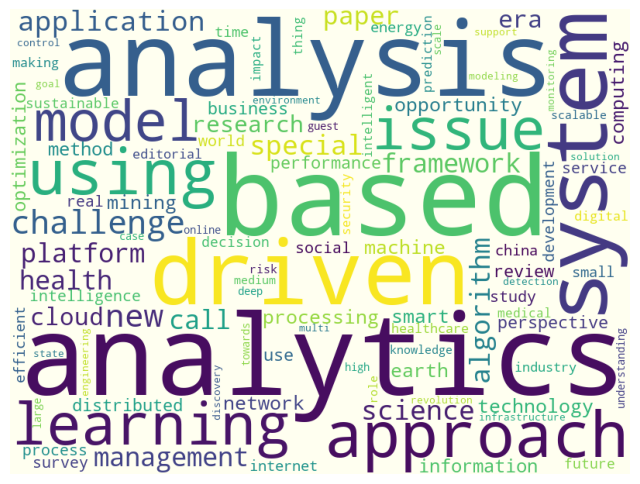

In [29]:
wc = WordCloud(background_color='ivory',stopwords=all_sw,width=800,height=600)
cloud = wc.generate_from_frequencies(dict(count.most_common(100)))
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()